# Test of running the code for several dates

*JASaa*

*PIE017 ISAE-SUPAERO*

## Load data and import functions

In [19]:
from eddies import load_netcdf4,eddy_detection,print_eddies,plot_eddies

#name of the netCDF data file
filename = 'Lebreton_2015.nc'

# load data
(f,lon,lat,depth,uvel,vvel,t) =  load_netcdf4(filename)

# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 2000
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 3 # set to 3 to be coherent with the use of the R2 method, 3 points seems like a reasonable minimun for a correlation 
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Print the dates

In [76]:
import datetime

def julianh2gregorian(time_hours,origin):
    return origin + datetime.timedelta(hours=time_hours)

origin_julian = datetime.date(1950, 1, 1) 

gregorian_dates = []
gregorian_str = []
for i in range(len(t)):
    gregorian_dates.append(julianh2gregorian(t[i],origin_julian))
    gregorian_str.append(str(gregorian_dates[i]))

print(gregorian_str)

['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20', '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29', '2015-08-30', '2015-08-31', '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04', '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08', '2015-09-09', '2015

## Run code for several days
We can start with a few eddies for a few day to test

In [ ]:
%%capture

eddy_data = []
for day in range(len(t)):
    eddy_data.append(eddy_detection(lon,lat,depth,uvel,vvel,day,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)) 
    #list: lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,circulation_mask

In [ ]:
import numpy as np

# (lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask,intensity_mask)
nEd = np.zeros(len(t),dtype=int)
n_cyclonic = np.zeros(len(t),dtype=int)
eddy_census_list = []
map_intensity = []
for day in range(len(t)):
    nEd[day] = eddy_data[day][8] #count the number of eddies for each day with circ>0 for each day
    eddy_census_list.append(eddy_data[day][7])
    n_cyclonic[day] = sum(circ > 0. for circ in eddy_census_list[day][1]) #count the number of eddies with circ>0 for each day
    map_intensity.append(eddy_data[day][10])

In [6]:
%%capture
data = eddy_detection(lon,lat,depth,uvel,vvel,0,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)

In [9]:
data[8]

197

In [55]:
print_eddies(eddy_census_list[0],nEd[0])


Eddie census data

        minOW  circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1   -3.326598 -5451.671475 -127.833336  40.416668  203.0    130.548555
2   -1.312622 -3099.286868 -130.666672  26.583334   28.0     53.268614
3   -2.640891 -3684.041451 -131.333328  28.916666   35.0     58.796918
4   -2.381205  5547.190935 -153.833328  27.250000  309.0    173.651436
5   -1.686378 -2796.587454 -131.000000  39.916668   54.0     67.840815
6   -2.729256  4640.578106 -133.166672  38.250000  222.0    138.460075
7   -6.455398 -5076.902428 -145.166672  39.666668   37.0     56.687007
8   -1.734236  3069.762762 -128.333328  33.666668   80.0     85.836499
9   -2.486086 -3740.353974 -137.666672  37.916668   54.0     69.059139
10  -8.346579  7241.461694 -126.083336  38.166668  346.0    173.134944
11  -1.272739 -3037.303669 -148.916672  38.666668    4.0     20.672296
12  -1.734865  3435.283661 -133.250000  30.916666   76.0     84.988059
13  -2.812012 -3593.308957 -148.583328  30.583334  131.0 

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(t)),nEd)
plt.ylabel('Total number of eddies')
plt.xlabel('Day')
plt.show()

NameError: name 'nEd' is not defined

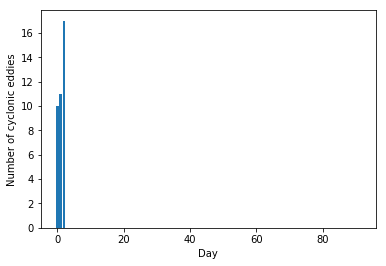

In [35]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(np.arange(len(t)),n_cyclonic)
plt.ylabel('Number of cyclonic eddies')
plt.xlabel('Day')
plt.show()

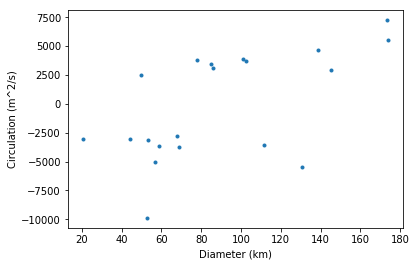

In [22]:
import matplotlib.pyplot as plt
#plot of circulation vs diameter for a certain day
day0 = 0 

plt.plot(eddy_census_list[day0][5,:nEd[day0]],eddy_census_list[day0][1,:nEd[day0]],'.')
plt.xlabel('Diameter (km)')
plt.ylabel('Circulation (m^2/s)')
plt.show()

In [24]:
eddy_census_list[day0][5,:nEd[day0]]

array([130.54855496,  53.26861357,  58.79691755, 173.65143593,
        67.840815  , 138.4600747 ,  56.68700726,  85.8364991 ,
        69.05913931, 173.13494367,  20.67229553,  84.98805914,
       111.76717745,  77.80335733,  44.23459408,  52.63395989,
       145.10322286,  49.64145051, 100.84619832, 102.38725895])

In [25]:
nEd

array([20, 29, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0])

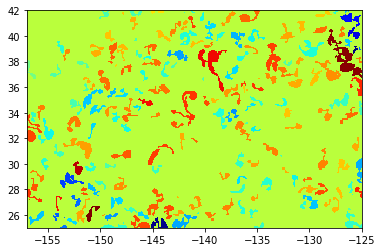

In [18]:
import matplotlib.pyplot as plt

plt.imshow(data[9][:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')

In [4]:
from eddies import local_peaks
local_peaks(data[5],OW_start,2000).shape

(3, 1758)

In [17]:
data[9].shape

(385, 205, 1)